# Import modules

In [397]:
# importing necessory Libraries necessory for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [398]:
# Load dataset
df = pd.read_csv('Iris.csv')
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,15,5.8,4.0,1.2,0.2,Iris-setosa
122,123,7.7,2.8,6.7,2.0,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
113,114,5.7,2.5,5.0,2.0,Iris-virginica
121,122,5.6,2.8,4.9,2.0,Iris-virginica


# Data Analysis

In [399]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [400]:
# check dimensions
df.shape

(150, 6)

In [401]:
# Look for Stats of data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [402]:
# Basic info about datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


4 float datatypes(Features) and 1 object datatype(Target) | 1 unnecessory column(Id)

In [403]:
# check for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No null value detected!

In [404]:
# Number of species in df['Species']
print("Number of unique species: ", df['Species'].nunique())

Number of unique species:  3


In [405]:
# Display type of samples in our target data.
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

3 types of Iris flowers, each of 50 samples

### Data Preprocessing

In [406]:
# df['id'] is unnecessary column. So we will remove it
df.drop('Id', axis=1, inplace=True)

In [407]:
# unnecessory data removed Successfully
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


There is no null value, no repeated data, and no unnecessary data.
Data cleaned successfully!

# Label Encoder
Convert df['Species'] Labels into Numeric(0,1,2) form. To use for Machine Learning model. 

In [408]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [409]:
#Before conversion
before = df['Species'].unique()

In [410]:
# Converting...
df['Species'] = lb.fit_transform(df['Species'])

In [411]:
#After conversion
after = df['Species'].unique()

In [412]:
# Conversion Result
print("Data before conversion: ", before, "\nData after conversion: ", after)

Data before conversion:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 
Data after conversion:  [0 1 2]


# Exploratory Data Analysis

C:\Users\saada\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


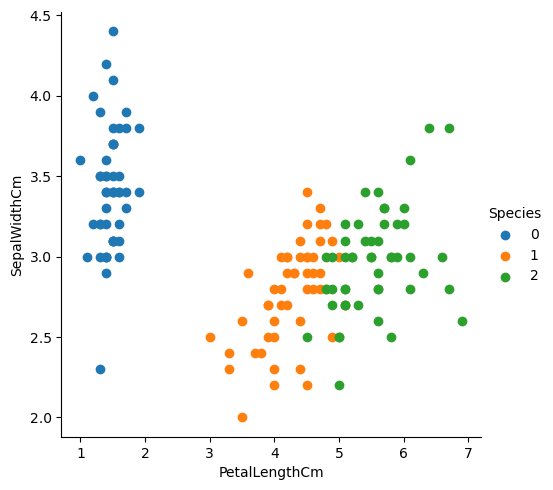

In [413]:
sns.FacetGrid(df, hue='Species', height=5).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()

###  Correlation Matrix

<Axes: >

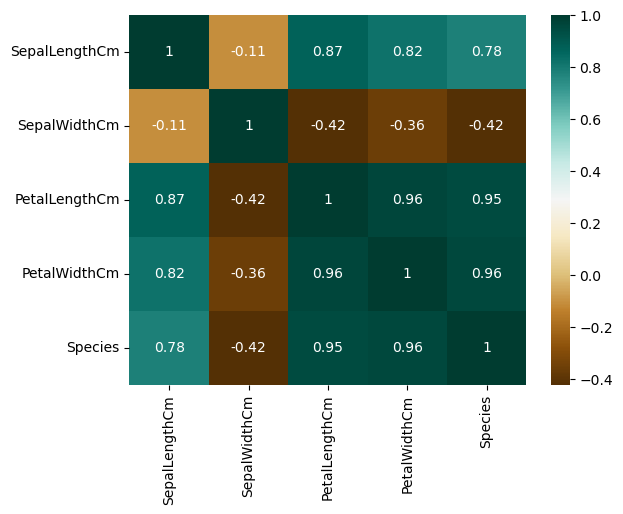

In [415]:
sns.heatmap(df.corr(), annot=True, cmap='BrBG')

Higher the color or near to value 1, more the correlation between attributes

### Outliers Handling

<Axes: >

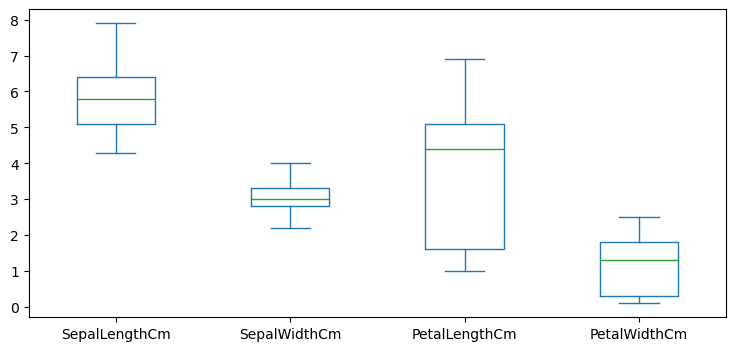

In [421]:
df.iloc[:,:4].plot(kind='box', figsize=(9,4)) # iloc -> first ':' is row selector and second ':' is column selector 

In [423]:
columns_to_check = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Function to remove outliers using the IQR method
def remove_outliers(data, features):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        
        # IQR formula
        IQR = Q3 - Q1
        
        # setting Lowe and upper bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data

# Remove outliers from the specified columns
df = remove_outliers(df, columns_to_check)

DataFrame now contains the dataset with outliers removed

<Axes: >

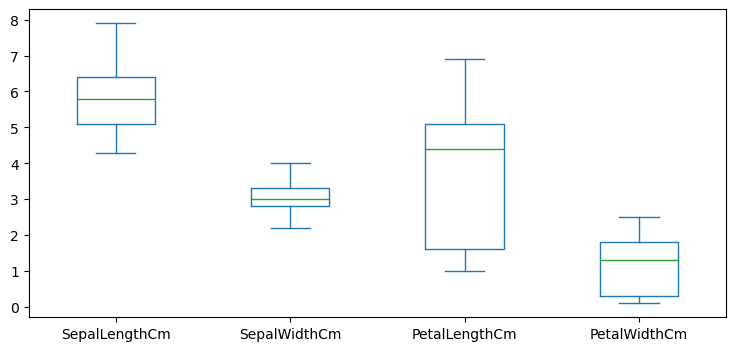

In [424]:
df.iloc[:,:4].plot(kind='box', figsize=(9,4)) # iloc -> first ':' is row selector and second ':' is column selector 

# Model Training

In [425]:
#Import train_test_split 
from sklearn.model_selection import train_test_split

In [426]:
#separating Features and Target columns 
x = df.drop(columns=['Species'])
y = df['Species']

In [429]:
# splitting data into Train and Test by the ratio of 80% Train and 20% Test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [432]:
# data divided into 80 and 30 pecent ratio 
x_train.shape, x_test.shape

((116, 4), (30, 4))

### Standard Scaler

In [433]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [434]:
# transforming data into 0s and 1s
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### KNN

In [435]:
# KNN - K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

k = df['Species'].nunique()
model = KNeighborsClassifier(n_neighbors=k)

In [436]:
# train model
model.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [437]:
# predict and expected data
predict = model.predict(x_test_scaled)
expected = y_test

In [438]:
from sklearn import metrics

In [439]:
accuracy = metrics.accuracy_score(predict,y_test)

In [440]:
# Check Accuracy
print("Accuracy Score: ", np.round(accuracy * 100,1),'%')

Accuracy Score:  96.7 %


# Summary 

In [441]:
from sklearn import metrics

In [442]:
print(metrics.classification_report(predict,expected))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.91      0.95        11
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# END